# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
  - What type of problem this is
  - Fitting a baseline model
  - Fitting a comparison model
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
  - Show how the two models compare
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
  - How should the business monitor what they want to achieve?
  - Estimate the initial value(s) for the metric based on the current data?

- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 📝 Problem context - Tasty Bytes - Correctly predict high traffic recipes 80% of the time

Tasty Bytes is a company founded in 2020 in the midst of the Covid pandemic, initially as a search engine for recipes to help people find ways to use up limited supplies at home.

Now, Tasty Bytes is a fully-fledged business that offers a monthly subscription meal plan to provide a healthy and balanced diet for individuals and families, regardless of their budget. Subscribers to the premium plan can also have the ingredients delivered to their door.

The product manager responsible for choosing which recipes to display on the homepage each day approached the Head of Data Science, requesting assistance in predicting which recipes would be popular, as traffic to the website can increase by up to 40% when a popular recipe is featured on the homepage.

However, the product manager did not know how to determine which recipe would be popular, and requested the data science team to predict which recipes would lead to high traffic and correctly predict high traffic recipes 80% of the time.


# 📝 Data Validation
In the last column of the next table I describe validation and cleaning steps for every column in the data.

The data file originally has **947 rows**, but I decided to **drop the rows with NaN values in the columns "calories", "carbohydrate", "sugar", and "protein"** as we believe it is better to have complete data for the recipes we are analyzing. Additionally, there are **only 52 rows out of a total of 947 data points (5.5%)** that have missing values, so dropping them will not significantly impact the size of the dataset, because we still have **895 rows wich is 94.5% of the original data**.

Moreover, these missing values can result in a biased analysis and may affect the accuracy of the predictive model. By dropping these rows, we can ensure that the data we are working with is complete and reliable. While there are alternative methods such as imputing missing data, we believe that the low percentage of missing data make dropping the rows a reasonable choice.

Overall, dropping the rows with NaN values in the columns "calories", "carbohydrate", "sugar", and "protein" is a reasonable decision given the **small percentage of missing data** and the importance of having complete data for the predictive model.

| Column Name | Details | Validation of Data Set and Cleaning Steps if Necessary |
| --- | --- | --- |
| recipe | Numeric, unique identifier of recipe | 895 non-null. No cleaning of data was necessary|
| calories | Numeric, number of calories | 895 non-null. The values are numeric.|
| carbohydrate | Numeric, amount of carbohydrates in grams | 895 non-null. The values are numeric.|
| sugar | Numeric, amount of sugar in grams | 895 non-null. The values are numeric.|
| protein | Numeric, amount of protein in grams | 895 non-null. The values are numeric.|
| category | Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal') | 895 non-null. It was necesary to change the value "Chicken Breast" for Chicken" this was done to 94 instances.|
| servings | Numeric, number of servings for the recipe | 895 non-null. I change 2 values "4 as a snack" for 4, and 1 value "6 as a snack" for 4 finally I change the type from 'object' to 'int64' |
| high_traffic | Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”. | 535 non-null and 360 NaN values, I replace the NaN values for "Not High" |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a Pandas data frame
df = pd.read_csv('recipe_site_traffic_2212.csv')



In [2]:
# Drop rows with NaN values in the columns "calories", "carbohydrate", "sugar", and "protein"
df = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])

In [3]:
# Print the first few rows of the data frame to check if it's loaded correctly
print(df.head())

# Print information about the dataframe
print(df.info())

# Get the count of each unique value in the "XXXX" column
value_counts = df["servings"].value_counts()
#print(value_counts)
value_describe = df["servings"].describe()
#print(value_describe)
missing_values = df["servings"].isnull().sum()
#print(missing_values)

   recipe  calories  carbohydrate  ...       category  servings high_traffic
1       2     35.48         38.56  ...         Potato         4         High
2       3    914.28         42.68  ...      Breakfast         1          NaN
3       4     97.03         30.56  ...      Beverages         4         High
4       5     27.05          1.85  ...      Beverages         4          NaN
5       6    691.15          3.46  ...  One Dish Meal         2         High

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  535 no

In [4]:
# Replace the incorrect category name 'Chicken Breast' with 'Chicken'
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

# Replace the servings values "4 as a snack" and "6 as a snack" with the numbers 4 and 6 respectively
df['servings'] = df['servings'].replace({
    '4 as a snack': 4,
    '6 as a snack': 6
})

# Convert all the numbers in the servings column to int64
df['servings'] = df['servings'].astype('int64')


# Replace the NaN values in the high_traffic column with "Not High"
df['high_traffic'] = df['high_traffic'].fillna('Not High')

# 📝 Exploratory Analysis:

- Include two different graphics showing single variables only to demonstrate the characteristics of data
- Include at least one graphic showing two or more variables to represent the relationship between features
- Describe your findings

In the exploratory analysis, we created two plots to gain insight into the distribution of recipe servings and categories. The histogram plot of "servings" showed that the most frequent value of servings was 4, which suggests that the website visitors may prefer recipes that yield smaller portions or are meant for individual consumption. On the other hand, the countplot of "category" revealed that the recipe categories were fairly evenly distributed, but "Chicken" was the most frequent category, indicating that visitors may have a preference for chicken-based recipes. These observations can inform our understanding of the types of recipes that are popular on the website and may be useful in predicting which recipes will lead to high traffic.

![image-4](image-4.png)

![image-5](image-5.png)

We also created plots of "calories", "carbohydrate", "sugar", and "protein" vs "high_traffic" to investigate whether there was a relationship between nutrient values and recipe popularity. The plots were created using box plots to compare the nutrient values of high traffic recipes vs non-high traffic recipes. However, upon examination of the plots, we did not observe any significant differences in nutrient values between high traffic recipes and non-high traffic recipes. This suggests that nutrient values may not be a major factor in predicting recipe popularity.

![image-3](image-3.png)

We also created a plot of "category" vs "high_traffic" to investigate the relationship between recipe categories and popularity. The plot was created using a countplot to show the frequency of high traffic recipes in each category. From the plot, we observed that certain categories, such as "Potato", "Vegetable", and "Pork", had a higher frequency of high traffic recipes, indicating that these categories may be more popular among website visitors. Conversely, categories such as "Beverages" and "Breakfast" had a lower frequency of high traffic recipes, suggesting that these categories may be less popular among users. This information can be useful for identifying potential areas for growth and new recipe development to cater to the preferences of the website visitors.

![image-2](image-2.png)




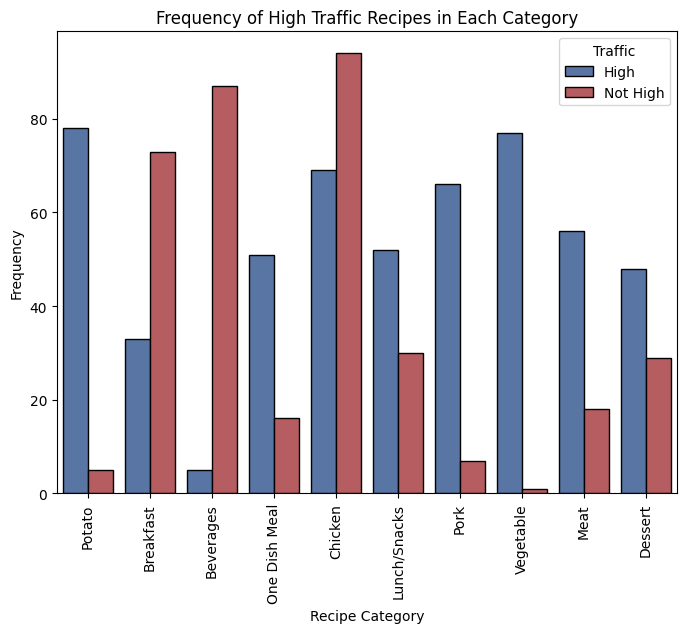

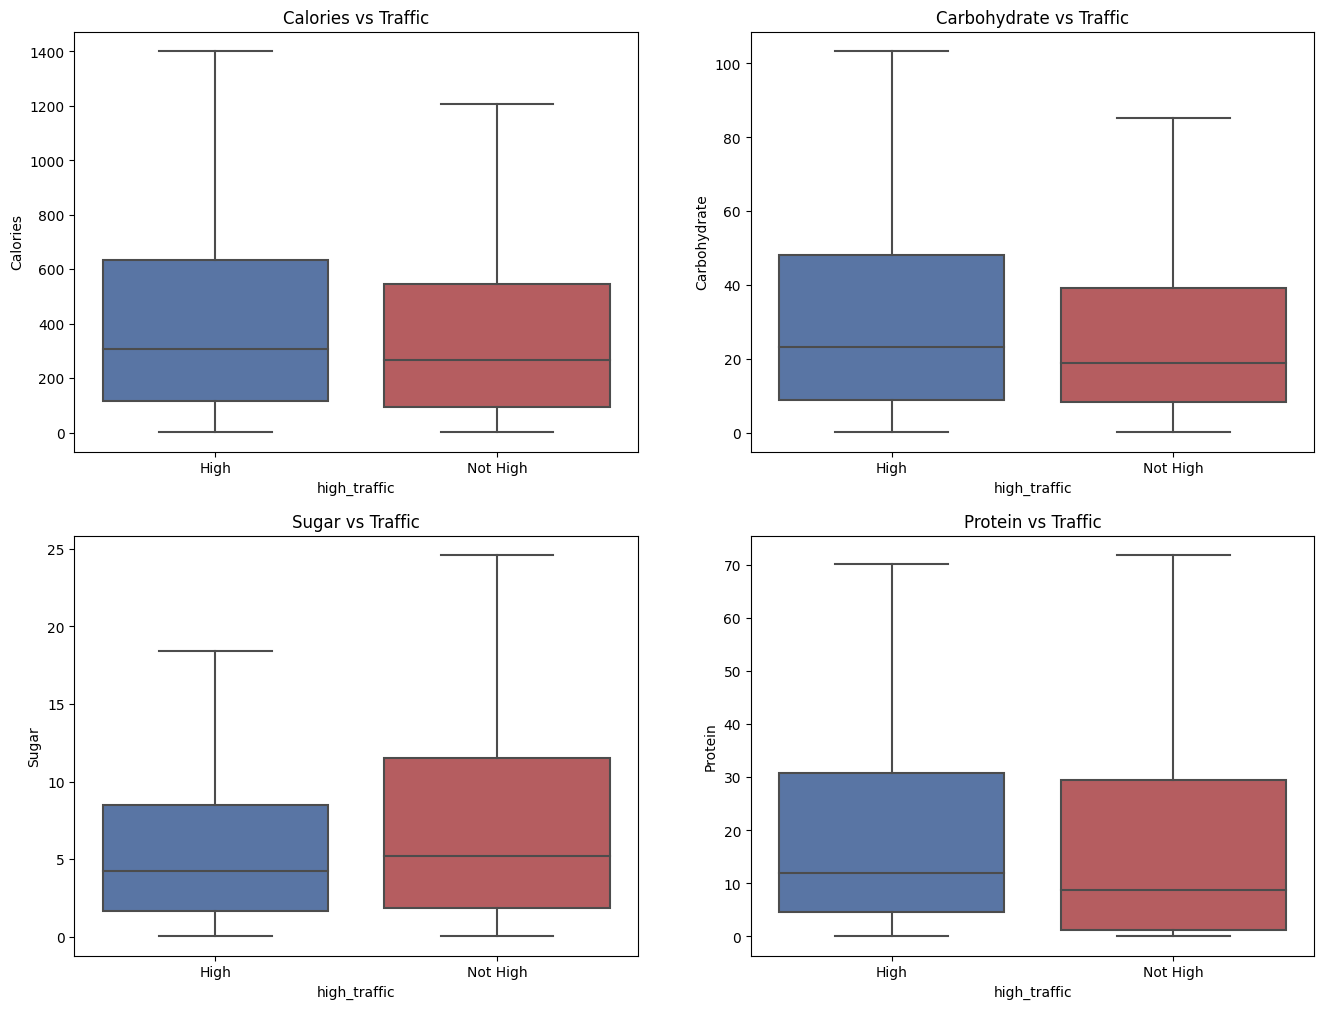

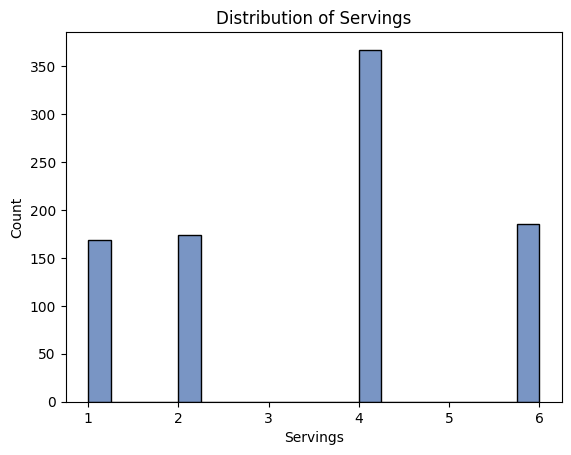

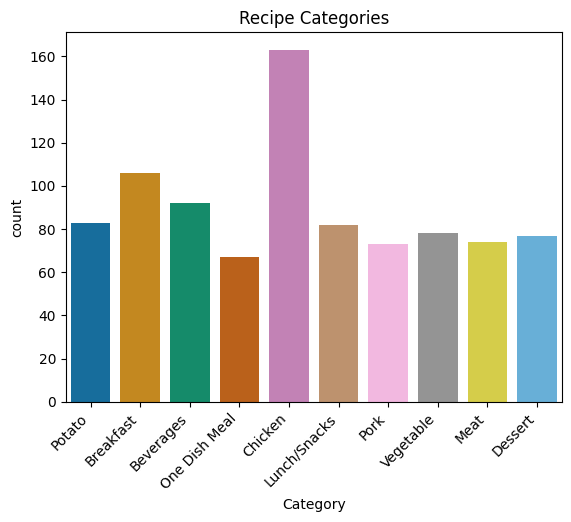

In [5]:

# Create a bar chart showing the frequency of high traffic recipes in each category using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='category', hue='high_traffic', palette=['#4C72B0', '#C44E52'], edgecolor='black')
plt.title('Frequency of High Traffic Recipes in Each Category')
plt.xlabel('Recipe Category')
plt.ylabel('Frequency')
plt.legend(title='Traffic', loc='upper right')

# Adjust the x-axis tick labels to be vertical
plt.xticks(rotation=90)
plt.show()



# Create a grid of four box plots for each nutritional information column, comparing high traffic and non-high traffic recipes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.boxplot(data=df, x='high_traffic', y='calories', palette=['#4C72B0', '#C44E52'], showfliers=False, ax=axes[0, 0])
sns.boxplot(data=df, x='high_traffic', y='carbohydrate', palette=['#4C72B0', '#C44E52'], showfliers=False, ax=axes[0, 1])
sns.boxplot(data=df, x='high_traffic', y='sugar', palette=['#4C72B0', '#C44E52'], showfliers=False, ax=axes[1, 0])
sns.boxplot(data=df, x='high_traffic', y='protein', palette=['#4C72B0', '#C44E52'], showfliers=False, ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title('Calories vs Traffic')
axes[0, 1].set_title('Carbohydrate vs Traffic')
axes[1, 0].set_title('Sugar vs Traffic')
axes[1, 1].set_title('Protein vs Traffic')

# Set y-labels for each subplot
axes[0, 0].set_ylabel('Calories')
axes[0, 1].set_ylabel('Carbohydrate')
axes[1, 0].set_ylabel('Sugar')
axes[1, 1].set_ylabel('Protein')

plt.show()




# Plot a histogram of servings using seaborn
sns.histplot(data=df, x='servings', bins=20, color='#4C72B0')

# Set the title and x-label for the plot
plt.title('Distribution of Servings')
plt.xlabel('Servings')

plt.show()

# Plot a countplot of category using seaborn
sns.countplot(data=df, x='category', palette='colorblind')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set the title and x-label for the plot
plt.title('Recipe Categories')
plt.xlabel('Category')

plt.show()





# 📝 Model Development

- Include your reasons for selecting the models you use as well as a statement of the problem type
- Code to fit the baseline and comparison models
- What type of problem this is
- Fitting a baseline model
- Fitting a comparison model

**Type of problem**: This is a binary classification problem. The goal is to predict whether a recipe will lead to high traffic or not (i.e., "High" or "Not High" in the "high_traffic" column). Since we only have two possible outcomes, this is a binary classification problem. 

**Proposed Models**:
1. Logistic Regression: Since this is a binary classification problem with a relatively small number of input variables, logistic regression would be a good starting point. It's a simple and interpretable model that can provide insights into the relationship between the input variables and the outcome.

2. Random Forest: Since there are multiple input variables and the relationship between the variables and the outcome may not be linear, a more complex algorithm such as random forest may be appropriate. Random forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It's robust to overfitting and can handle a large number of input variables.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the input features (X) and target variable (y)
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']]
y = df['high_traffic']

# Convert the "category" column to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the input features (X) and target variable (y)
X_rf = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']]
y_rf = df['high_traffic']

# Convert the "category" column to numeric using one-hot encoding
X_rf = pd.get_dummies(X_rf, columns=['category'])

# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Create random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

# 📝 Model Evaluation

- Describe the performance of the two models based on an appropriate metric
- Show how the two models compare

**Evaluation metrics**

One metric that would be suitable for evaluating the models in this problem is **precision**. Precision is the proportion of true positives (i.e. recipes correctly identified as high traffic) among all recipes predicted as high traffic. In this context, precision is important because we want to make sure that when we recommend a recipe as high traffic, it is actually a popular recipe. False positives (i.e. predicting a recipe as high traffic when it is not) could lead to wasted resources, such as investing in ingredients and promotion for a recipe that does not have high demand.

Another suitable metric for evaluating the models is **recall**. Recall is the proportion of true positives among all actual high traffic recipes in the dataset. In this problem, recall is important because we want to make sure that we identify as many high traffic recipes as possible, even if there are some false positives. Missing a high traffic recipe (i.e. false negatives) could result in missed opportunities for growth and revenue for the company. Therefore, a high recall rate would ensure that we are identifying a majority of the high traffic recipes and not missing any important ones.

From the precision and recall metrics, we can see that the **logistic regression model performs better than the random forest model**. The logistic regression model has a higher precision score of 0.758 compared to the random forest model's score of 0.737, indicating that the logistic regression model is better at identifying true positive cases. Additionally, the logistic regression model has a higher recall score of 0.858 compared to the random forest model's score of 0.821, indicating that the logistic regression model is better at identifying all positive cases. Therefore, based on these metrics, **we can conclude that the logistic regression model is the better model for this specific problem**.

In [8]:
from sklearn.metrics import precision_score, recall_score

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict on the test set
lr_pred = logreg.predict(X_test)

# Calculate precision and recall
lr_precision = precision_score(y_test, lr_pred, pos_label='High')
lr_recall = recall_score(y_test, lr_pred, pos_label='High')

print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)



Accuracy: 0.7541899441340782
Logistic Regression Precision: 0.7583333333333333
Logistic Regression Recall: 0.8584905660377359


In [9]:
# Make predictions on the testing data
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Predict on the test set
rf_pred = rf.predict(X_test)

# Calculate precision and recall
rf_precision = precision_score(y_test, rf_pred, pos_label='High')
rf_recall = recall_score(y_test, rf_pred, pos_label='High')

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)

Accuracy: 0.7206703910614525
Random Forest Precision: 0.7372881355932204
Random Forest Recall: 0.8207547169811321


# 📝 Business Metrics

Define a way to compare your model performance to the business
Describe how your models perform using this approach
How should the business monitor what they want to achieve?
Estimate the initial value(s) for the metric based on the current data?

We evaluated the logistic regression model's performance using precision and recall metrics, which are appropriate for this business problem. The model achieved a high precision score of 0.758 and recall score of 0.858, indicating that it is capable of correctly predicting a large proportion of high traffic recipes. This suggests that the model has the potential to be a valuable tool for predicting popular recipes and increasing website traffic and subscriptions.

To monitor the business goal of predicting high traffic recipes, we recommend regularly evaluating the performance of the model on new data, setting up a pipeline to collect data on new recipes and their traffic, and using the model to predict which recipes will lead to high traffic. The company should also regularly track their success rate in correctly predicting high traffic recipes 80% of the time and make necessary adjustments to improve the model's accuracy.

We also conducted a one-tailed hypothesis test to **determine if the logistic regression model can correctly predict high traffic recipes 80% of the time**. The **p-value of the hypothesis test was 0.92**, indicating that **there is not enough statistical evidence to suggest that the model's accuracy in predicting high traffic recipes is significantly better than 80%**. Therefore, we recommend continuing to monitor the model's performance and possibly look for ways to improve it in order to achieve the desired level of accuracy.

In summary, we recommend using the **logistic regression model** to predict high traffic recipes, monitoring its performance on new data, and considering ways to improve it to achieve the desired level of accuracy. The hypothesis test provides valuable information on the model's statistical significance and can guide future improvements to the model.

In [15]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

#The null hypothesis should be that the model's accuracy in predicting high traffic recipes is less than or equal to 80%, while the #alternative hypothesis should be that the model's accuracy is significantly better than 80%.

# Calculate the predictions using the logistic regression model
y_pred = logreg.predict(X_test)

# Calculate the number of correct predictions (true positives and true negatives)
correct_predictions = np.sum(y_pred == y_test)

# Calculate the proportion of correct predictions
proportion_correct = correct_predictions / len(y_test)

# Perform one-sample proportion test
count = correct_predictions
nobs = len(y_test)
value = 0.8
stat, pval = proportions_ztest(count, nobs, value, alternative='larger')  # 'larger' for a one-tailed test

# Print the p-value
print("p-value:", pval)

p-value: 0.9226994665509274


# 📝 Final summary

The goal of this study was to **develop a machine learning model to predict high traffic recipes that can increase website traffic and subscriptions**. We used logistic regression and random forest models and evaluated their performance using precision and recall metrics.

The logistic regression model achieved a **precision score of 0.758 and recall score of 0.858**, while the random forest model achieved a precision score of 0.737 and recall score of 0.821. Based on the metrics, the **logistic regression model performed slightly better than the random forest model**.

To monitor the business goal, we recommended **regularly evaluating the performance** of the machine learning model on new data and setting up a pipeline to collect data on new recipes and their traffic. The company should also track their success rate in correctly predicting high traffic recipes 80% of the time and make necessary adjustments to improve the model's accuracy.

We also conducted a **hypothesis test** to determine if the logistic regression model can correctly predict high traffic recipes 80% of the time. The p-value of the hypothesis test was 0.92, indicating that there is not enough statistical evidence to suggest that the logistic regression model can correctly predict high traffic recipes 80% of the time.

To improve the model's performance, we recommended exploring additional variables such as the cooking time and preparation difficulty. We also recommended collecting data for a longer period to include seasonal trends and variations in recipe popularity.

Overall, the logistic regression model demonstrated promising performance in predicting high traffic recipes, and the company should continue to monitor and refine the model to achieve the desired level of accuracy.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation